<a href="https://colab.research.google.com/github/milenoepifanio/ML_Titanic/blob/main/An%C3%A1lise_do_Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse pequeno projeto tem como objetivo analisar a base de dados de passageiros do titanic, disponível em -> https://www.kaggle.com/competitions/titanic/data?select=train.csv


Dicionário de Variáveis encontradas na base:

*  PassengerID: Número de identificação do passageiro
*  Survived: Informa se o passageiro sobreviveu ao naufrágio
*  PCclass: Classe do bilhete
*  Name: Nome do passageiro
*  Sex: Sexo do passageiro
*  Age: Idade do passageiro
*  SibSp: Quantidade de cônjuges e/ou irmãos a bordo
*  Parch: Quantidade de pais e filhos a bordo
*  Ticket: Número da passagem
*  Fare: Preço da passagem
*  Cabin: Número da cabine do passageiro
*  Embarked: Porto de embarque: (C = Cherbourg; Q = Queenstown; S = Southampton)



Antes de tudo, é necessário realizar o import das bibliotecas necessárias e a da base utilizada, que foi realizado upload na minha conta pessoal do Google Drive.

In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_csv('/content/test.csv')
treino = pd.read_csv('/content/train.csv')
#dados = pd.read_excel('/content/drive/MyDrive/base_titanic.xlsx')

Inicialmente, faço a checagem do tipo de dado das colunas presentes na base, assim como uma contagem de valores e um describe, visando conhecimento de base

In [153]:
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [154]:
treino.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [155]:
print(treino.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Por alguns count de colunas retornaram um valor abaixo do esperado (891), é preciso checar quantos valores são não nulos nas colunas

In [156]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
treino.isnull().sum().sort_values(ascending=False).head(10)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [158]:
treino['Age'].round().value_counts()

24.0    32
22.0    27
28.0    27
30.0    27
18.0    26
        ..
53.0     1
80.0     1
12.0     1
0.0      1
74.0     1
Name: Age, Length: 71, dtype: int64

In [159]:
treino['Pclass'].value_counts().sort_values(ascending = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [160]:
treino.nunique().sort_values(ascending=False)
## Vemos que as abas de Name e Ticket e Cabin sempre serão diferentes e não ajudam em nada

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [161]:
dados2 = dados.drop(['Name', 'Ticket', 'Cabin'],axis=1)
dados2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [162]:
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [163]:
treino.Age.mean()

29.69911764705882

In [164]:
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()
dados.loc[dados.Age.isnull(),'Age'] = dados.Age.mean()
# Atribuindo a idade média a quem tem idade null

In [165]:
dados.loc[dados.Fare.isnull(),'Fare'] = dados.Fare.mean()

In [166]:
treino['Age'] = treino.Age.astype(int)

#Transformando Age em Inteiro, para facilitar a criação de gráficos no futuro.

In [167]:
# Verificar os valores mais frequentes na Embarked
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [168]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]
#Erro tá aqui, ele deveria subtituir por 'S' em vez de 'Sim'

In [169]:
treino.isnull().sum().sort_values(ascending=False).head(10)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
dtype: int64

In [170]:
print("A idade média dos tripulantes é de: {0}".format(dados2['Age'].mean()))
print("A classe média dos tripulantes é de: {0}".format((dados2['Pclass']).mean()))
print("Portão mais utilizado para embarque: {0}".format(dados2['Embarked'].mode()))

A idade média dos tripulantes é de: 30.272590361445783
A classe média dos tripulantes é de: 2.2655502392344498
Portão mais utilizado para embarque: 0    S
Name: Embarked, dtype: object


## Explorando Machine Leading

In [172]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [173]:
#Retiramos os valores que atrapalharão no modelo ou não iremos utilizar. Como o Survived é o que queremos prever, ele irá ser retirado
X = treino.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex'], axis=1)
Y = treino.Survived

In [175]:
#Dividindo nossa base em duas bases menores.
X_Train, X_val, Y_Train, Y_val = train_test_split(X,Y, test_size = 0.33, random_state=42)

*texto em itálico*### Arvore de classificação

In [176]:
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [177]:
clf_ac = clf_ac.fit(X_Train,Y_Train)

In [178]:
y_pred_ac = clf_ac.predict(X_val)

### KNeighborsClassifier

In [179]:
# Criando nosso classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [180]:
clf_knn = clf_knn.fit(X_Train,Y_Train)

In [181]:
y_pred_knn = clf_knn.predict(X_val)



```
# Isto está formatado como código
```

### Regressão Logística

In [182]:
# Criando o indicador que será utilizado
clf_rl = LogisticRegression(random_state=42)

In [183]:
#Fazendo o fit com os dados
clf_rl = clf_rl.fit(X_Train,Y_Train)

In [184]:
y_pred_rl = clf_rl.predict(X_val)

### Testando acurácia

In [185]:
from sklearn.metrics import accuracy_score

In [186]:
accuracy_score(Y_val, y_pred_ac)

0.6169491525423729

In [187]:
accuracy_score(Y_val, y_pred_knn)

0.6576271186440678

In [188]:
accuracy_score(Y_val, y_pred_rl)

0.7254237288135593

### Validando a matriz de confussão

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(Y_val, y_pred_ac)

array([[124,  51],
       [ 62,  58]])

In [191]:
confusion_matrix(Y_val, y_pred_knn)

array([[140,  35],
       [ 66,  54]])

In [192]:
confusion_matrix(Y_val, y_pred_rl)

array([[156,  19],
       [ 62,  58]])

### Fazendo a previsão para os dados de testes

In [193]:
X_Train.head(3)

,Pclass,Age,SibSp,Parch,Fare
6,1,54,0,0,51.8625
718,3,29,0,0,15.5000
685,2,25,1,2,41.5792


In [194]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7.2500
1,1,38,1,0,71.2833
2,3,26,0,0,7.9250


In [195]:
X_teste = dados.drop(['PassengerId', 'Cabin', 'Embarked', 'Name', 'Sex', 'Ticket'],axis=1)
X_teste.head(100)

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
95,3,25.0,0,0,7.7958
96,1,76.0,1,0,78.8500
97,3,29.0,0,0,7.9250
98,3,20.0,0,0,7.8542


In [196]:
y_pred = clf_rl.predict(X_teste)

In [197]:
dados['Survived'] = y_pred

In [198]:
base_envio = dados[['PassengerId','Survived']]

In [199]:
base_envio.to_csv('resultados2.csv',index=False)

A base final obteve um resultado na taxa de acertos de 66.26% na predição utilizada, conforme informado pelo próprio Kaggle.

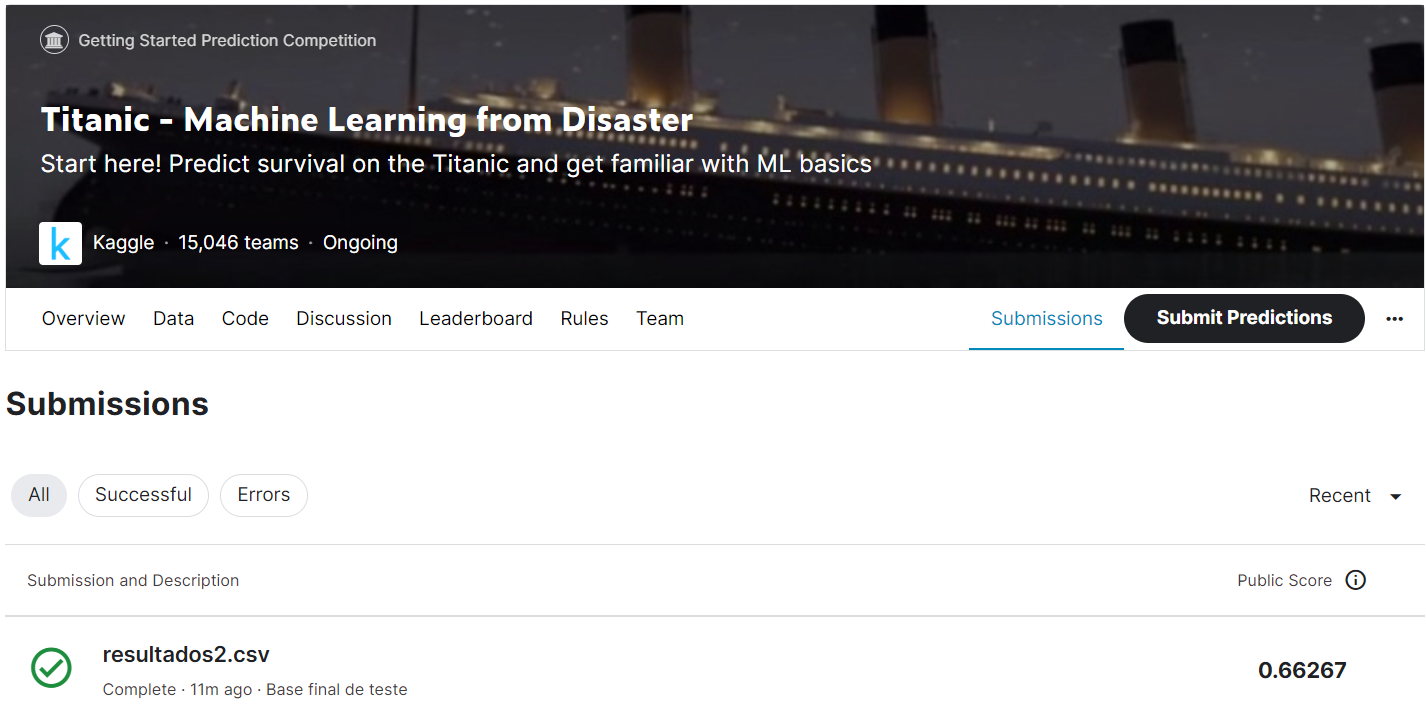